In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [172]:
!pip install ucimlrepo

In [56]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
superconductivty_data = fetch_ucirepo(id=464)

# data (as pandas dataframes)
X = superconductivty_data.data.features
y = superconductivty_data.data.targets

# metadata
print(superconductivty_data.metadata)

# variable information
print(superconductivty_data.variables)

{'uci_id': 464, 'name': 'Superconductivty Data', 'repository_url': 'https://archive.ics.uci.edu/dataset/464/superconductivty+data', 'data_url': 'https://archive.ics.uci.edu/static/public/464/data.csv', 'abstract': 'Two file s contain data on 21263 superconductors and their relevant features.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 21263, 'num_features': 81, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['critical_temp'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C53P47', 'creators': ['Kam Hamidieh'], 'intro_paper': {'ID': 452, 'type': 'NATIVE', 'title': 'A data-driven statistical model for predicting the critical temperature of a superconductor', 'authors': 'K. Hamidieh', 'venue': 'Computational materials science', 'year': 2018, 'journal': None, 'DOI': None, 'URL': 'http

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

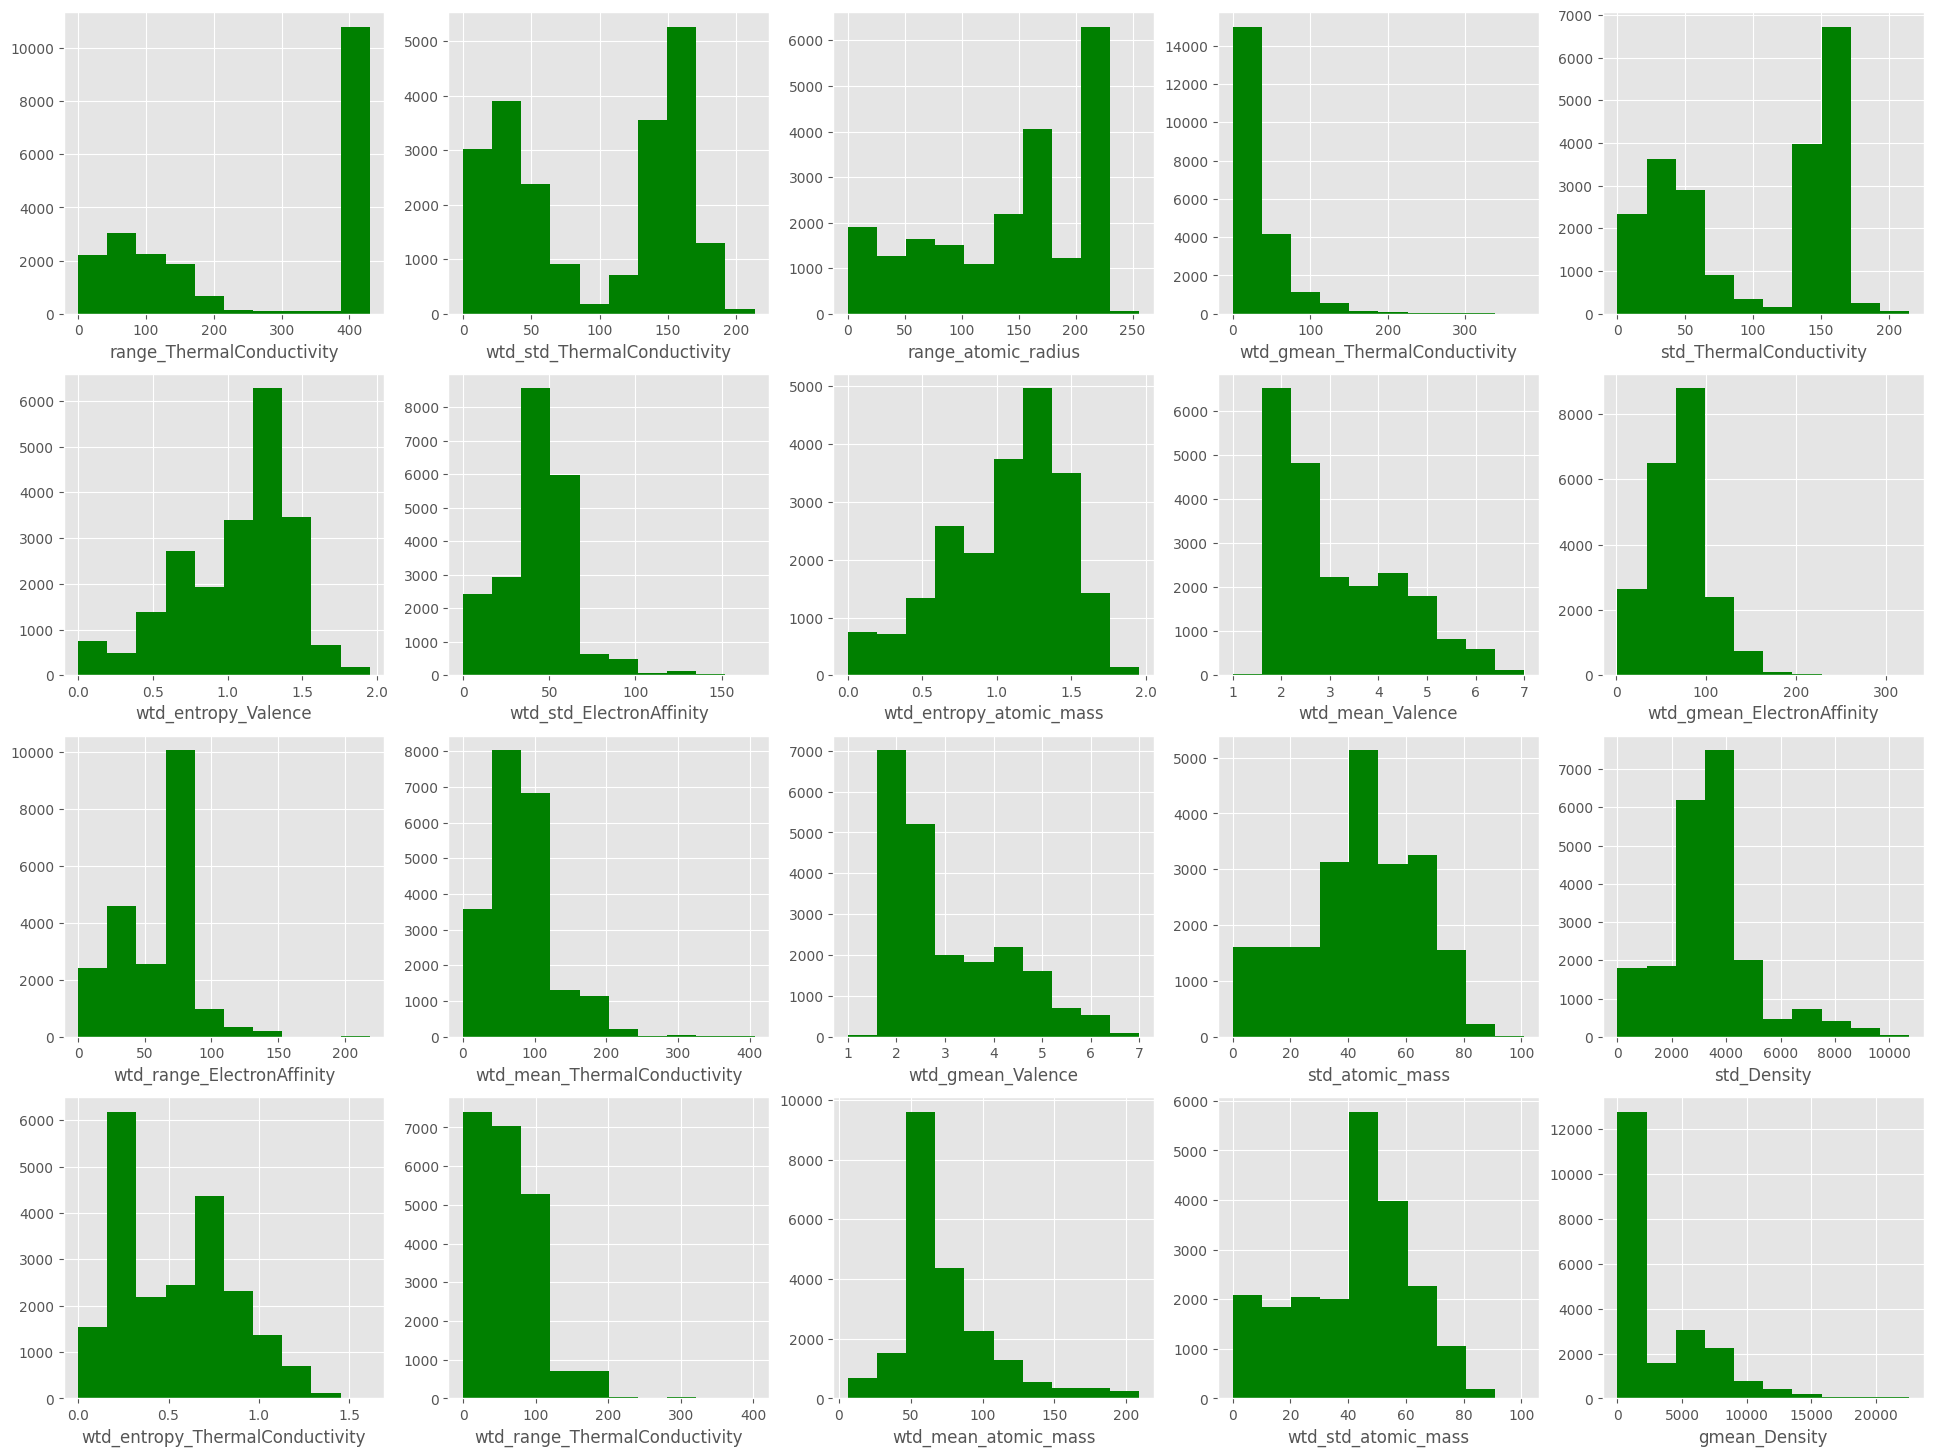

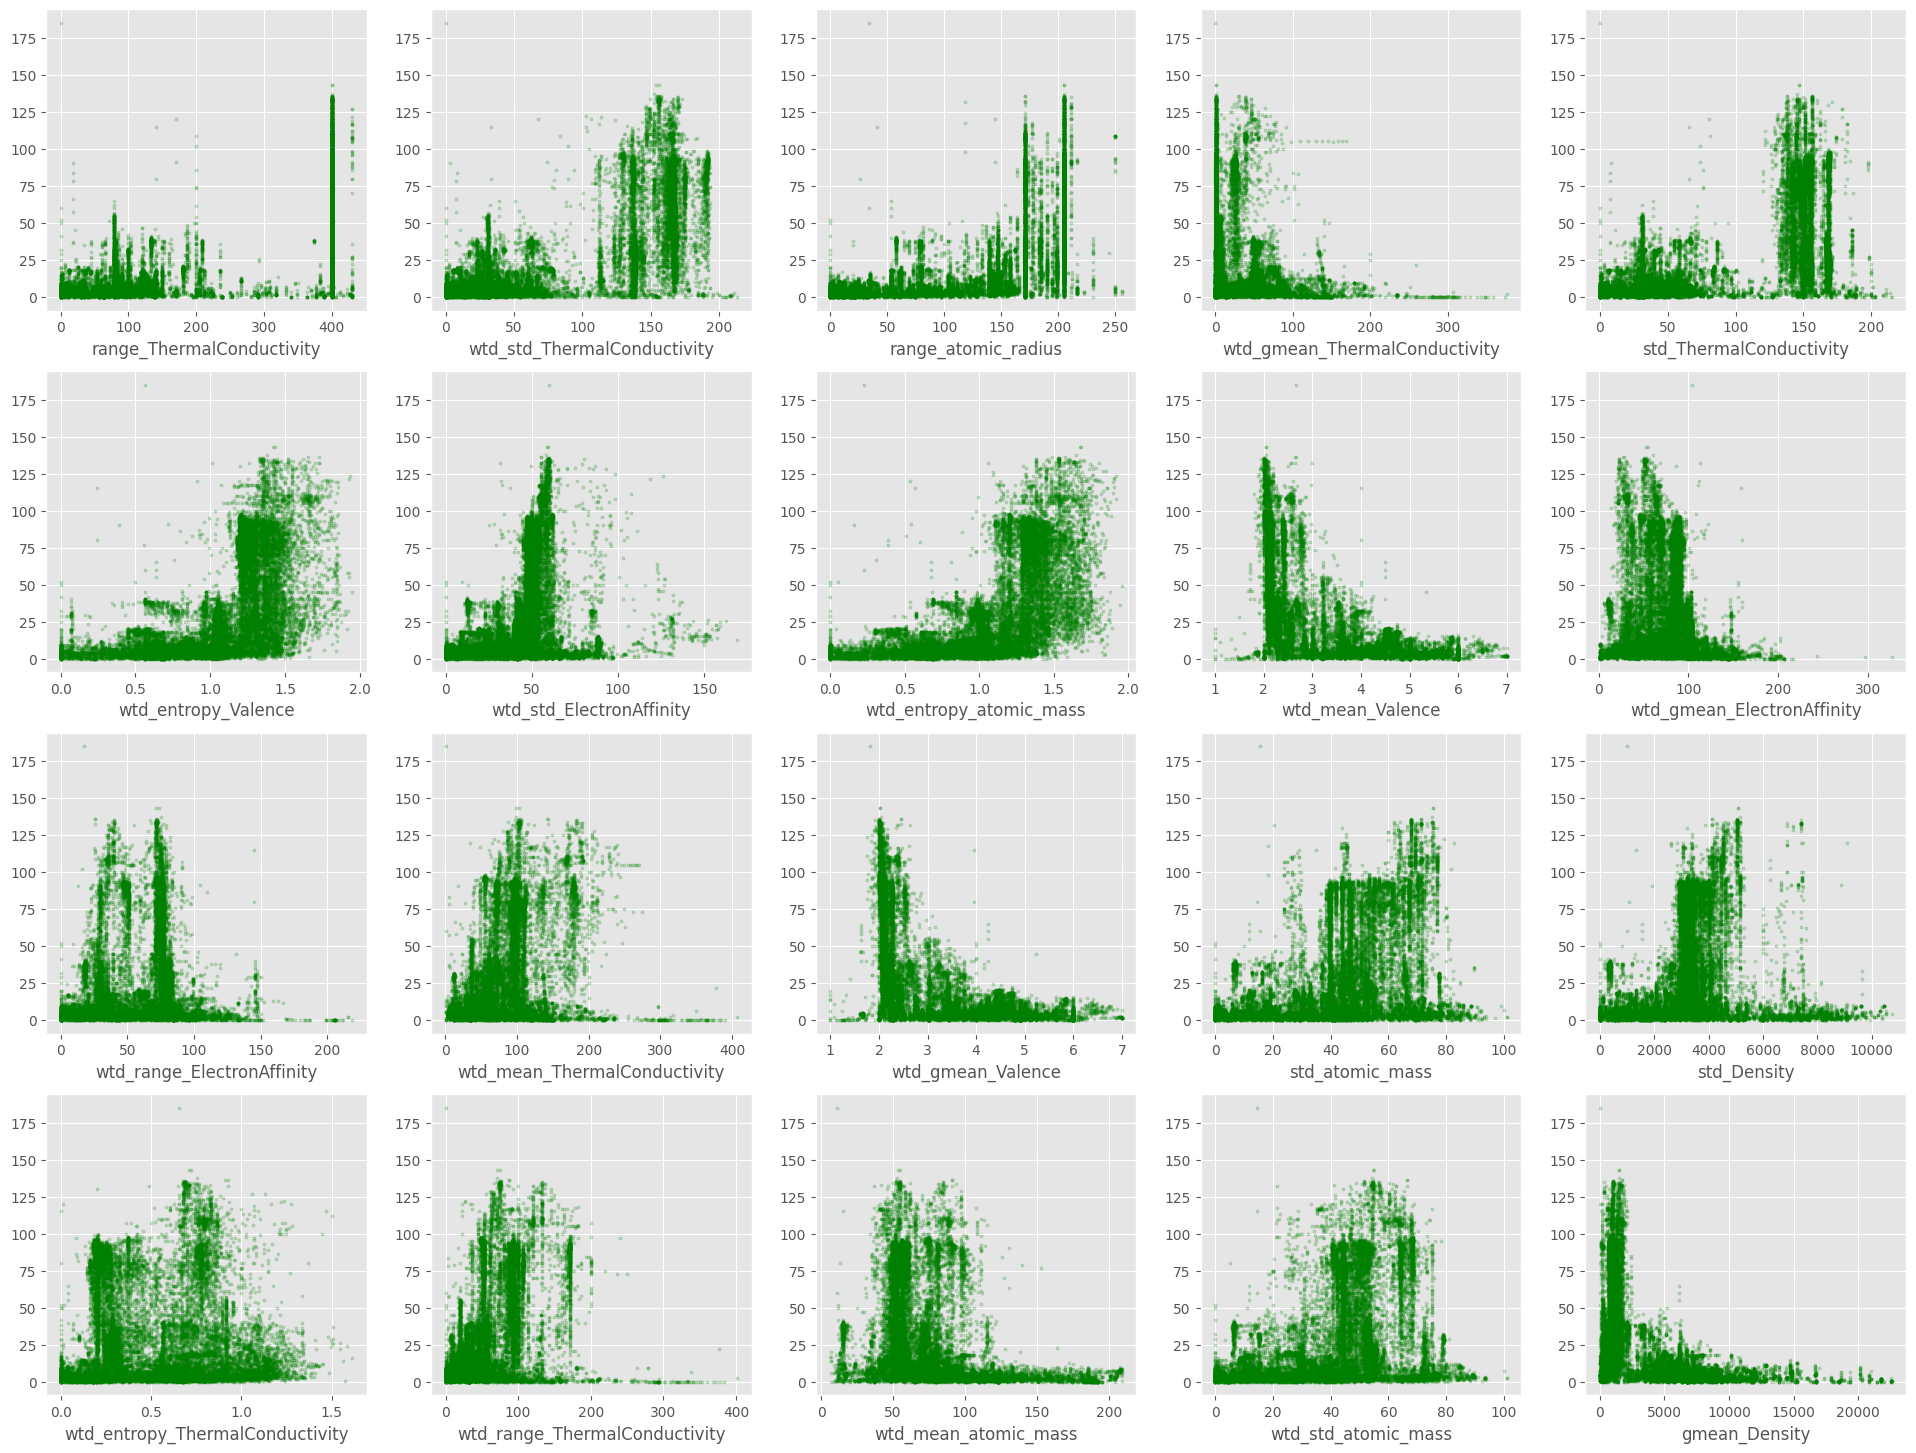

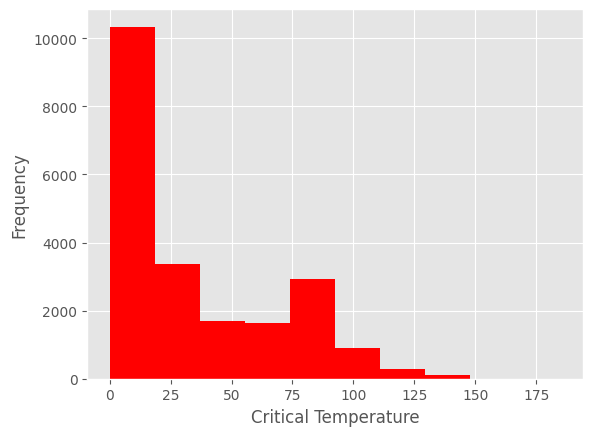

In [79]:
print(X.columns)

X_TC = X.filter(regex=('.*ThermalConductivity'))
Top20 = ['range_ThermalConductivity', 'wtd_std_ThermalConductivity', 'range_atomic_radius',
         'wtd_gmean_ThermalConductivity', 'std_ThermalConductivity', 'wtd_entropy_Valence',
         'wtd_std_ElectronAffinity', 'wtd_entropy_atomic_mass', 'wtd_mean_Valence', 'wtd_gmean_ElectronAffinity',
         'wtd_range_ElectronAffinity', 'wtd_mean_ThermalConductivity', 'wtd_gmean_Valence',
         'std_atomic_mass', 'std_Density', 'wtd_entropy_ThermalConductivity', 'wtd_range_ThermalConductivity',
         'wtd_mean_atomic_mass', 'wtd_std_atomic_mass', 'gmean_Density']
X_20 = X[Top20]
X_15 = X[Top20[0:15]]
X_4 = X[Top20[0:4]]

plt.style.use('ggplot')
fig, axs = plt.subplots(4, 5, figsize=(24, 18))
headings = X_20.columns

for i in range(len(headings)):
  plt.subplot(4, 5, i+1)
  plt.hist(X_20[headings[i]], bins=10, color = 'g')
  plt.xlabel(headings[i])
plt.show()


plt.style.use('ggplot')
fig, axs = plt.subplots(4, 5, figsize=(24, 18))
headings = X_20.columns

for i in range(len(headings)):
  plt.subplot(4, 5, i+1)
  plt.scatter(X_20[headings[i]], y, s=5, alpha = 0.2, color = 'g')
  plt.xlabel(headings[i])
plt.show()


plt.hist(y, bins=10, color = 'r')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')
plt.show()

In [128]:
def LReg(X, y):
  scoring = ['r2', 'neg_root_mean_squared_error']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  regr = LinearRegression()

  scores = cross_validate(regr, X_train, y_train, cv = 10, scoring=scoring)
  print(scores.keys())
  print('Fit time: \n', 'Mean:', scores['fit_time'].mean(), '\tStandard Deviation:', scores['fit_time'].std())
  print('Score time: \n', 'Mean:', scores['score_time'].mean(), '\tStandard Deviation:', scores['score_time'].std())
  print('R2: \n', 'Mean:', scores['test_r2'].mean(), '\tStandard Deviation:', scores['test_r2'].std())
  print('RMSE: \n', 'Mean:', scores['test_neg_root_mean_squared_error'].mean(), '\tStandard Deviation:', scores['test_neg_root_mean_squared_error'].std())

In [129]:
print('Full Data Set')
LReg(X, y) #Full

print('\nTop20 Data Set')
LReg(X_20, y)

print('\n75% Data Set')
LReg(X_15, y) #Top15 appx 75%

print('\n50% Data Set')
LReg(X_4, y)  #Top4 appx 50%

print('\nThermal Conductivity Data Set')
LReg(X_TC, y)

Full Data Set
dict_keys(['fit_time', 'score_time', 'test_r2', 'test_neg_root_mean_squared_error'])
Fit time: 
 Mean: 0.046760725975036624 	Standard Deviation: 0.005300614084754011
Score time: 
 Mean: 0.004264140129089355 	Standard Deviation: 0.0006660805752333432
R2: 
 Mean: 0.7341163744585234 	Standard Deviation: 0.014773991531959801
RMSE: 
 Mean: -17.682531085173036 	Standard Deviation: 0.44731997532471734

Top20 Data Set
dict_keys(['fit_time', 'score_time', 'test_r2', 'test_neg_root_mean_squared_error'])
Fit time: 
 Mean: 0.009230709075927735 	Standard Deviation: 0.0014651384653211839
Score time: 
 Mean: 0.003478670120239258 	Standard Deviation: 0.0004991983613498287
R2: 
 Mean: 0.6600481770652952 	Standard Deviation: 0.017724158125077907
RMSE: 
 Mean: -19.996451321427738 	Standard Deviation: 0.5171331865431834

75% Data Set
dict_keys(['fit_time', 'score_time', 'test_r2', 'test_neg_root_mean_squared_error'])
Fit time: 
 Mean: 0.007179880142211914 	Standard Deviation: 0.0008280121705

In [132]:
def RF(X, y):
  scoring = ['r2', 'neg_root_mean_squared_error']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  rf = RandomForestRegressor(n_estimators=100, random_state=0)
  scores = cross_validate(rf, X_train, y_train.values.ravel(), cv = 10, scoring=scoring)
  print('Fit time: \n', 'Mean:', scores['fit_time'].mean(), '\tStandard Deviation:', scores['fit_time'].std())
  print('Score time: \n', 'Mean:', scores['score_time'].mean(), '\tStandard Deviation:', scores['score_time'].std())
  print('R2: \n', 'Mean:', scores['test_r2'].mean(), '\tStandard Deviation:', scores['test_r2'].std())
  print('RMSE: \n', 'Mean:', scores['test_neg_root_mean_squared_error'].mean(), '\tStandard Deviation:', scores['test_neg_root_mean_squared_error'].std())


In [133]:
print('Full Data Set')
RF(X, y) #Full

print('\nTop20 Data Set')
RF(X_20, y)

print('\n75% Data Set')
RF(X_15, y) #Top15 appx 75%

print('\n50% Data Set')
RF(X_4, y)  #Top4 appx 50%

print('\nThermal Conductivity Data Set')
RF(X_TC, y)

Full Data Set
Fit time: 
 Mean: 89.02515716552735 	Standard Deviation: 0.5694493357900166
Score time: 
 Mean: 0.06748158931732177 	Standard Deviation: 0.0024250896908401117
R2: 
 Mean: 0.9211474045364433 	Standard Deviation: 0.008927138519851937
RMSE: 
 Mean: -9.61839268009238 	Standard Deviation: 0.5685581549335065

Top20 Data Set
Fit time: 
 Mean: 23.76629149913788 	Standard Deviation: 0.0896548599218986
Score time: 
 Mean: 0.06224305629730224 	Standard Deviation: 0.0018438612722476478
R2: 
 Mean: 0.9200821686441115 	Standard Deviation: 0.009079077524868659
RMSE: 
 Mean: -9.682835933259657 	Standard Deviation: 0.5632336215616812

75% Data Set
Fit time: 
 Mean: 17.881600999832152 	Standard Deviation: 0.2531423737539172
Score time: 
 Mean: 0.06453289985656738 	Standard Deviation: 0.006012389096192026
R2: 
 Mean: 0.9175567850637553 	Standard Deviation: 0.009106481302317587
RMSE: 
 Mean: -9.836015100993746 	Standard Deviation: 0.5667293381448436

50% Data Set
Fit time: 
 Mean: 4.32542636

In [136]:
X_20_train, X_20_test, y_train, y_test = train_test_split(X_20, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_20_train, y_train.values.ravel())
y_pred = rf.predict(X_20_test)

In [155]:
scoring = ['r2', 'neg_root_mean_squared_error']
scores = cross_validate(rf, X_20_train, y_train.values.ravel(), cv = 10, scoring=scoring)
print('Fit time: \n', 'Mean:', scores['fit_time'].mean(), '\tStandard Deviation:', scores['fit_time'].std())
print('Score time: \n', 'Mean:', scores['score_time'].mean(), '\tStandard Deviation:', scores['score_time'].std())
print('R2: \n', 'Mean:', scores['test_r2'].mean(), '\tStandard Deviation:', scores['test_r2'].std())
print('RMSE: \n', 'Mean:', scores['test_neg_root_mean_squared_error'].mean(), '\tStandard Deviation:', scores['test_neg_root_mean_squared_error'].std())


Fit time: 
 Mean: 24.071632552146912 	Standard Deviation: 0.22840201557088843
Score time: 
 Mean: 0.06416087150573731 	Standard Deviation: 0.0018108892438221935
R2: 
 Mean: 0.9200821686441115 	Standard Deviation: 0.009079077524868659
RMSE: 
 Mean: -9.682835933259657 	Standard Deviation: 0.5632336215616812


/tmp/ipython-input-2185817862.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


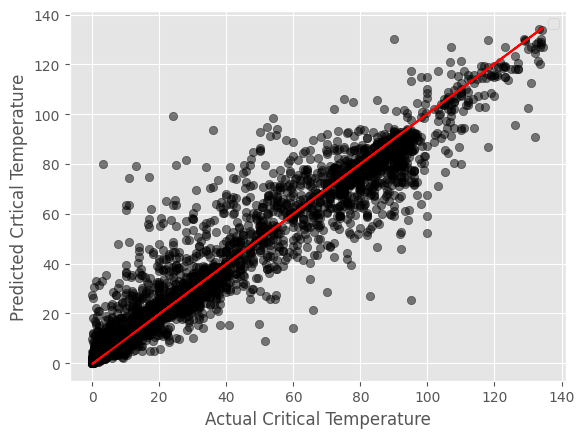

In [152]:
slope, intercept = np.polyfit(y_pred, y_test, 1)
line = slope * y_pred + intercept

plt.scatter(y_test, y_pred, color='black', alpha = 0.5)
plt.plot(y_pred, line, color='red')
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Crtical Temperature')
plt.legend()
plt.show()

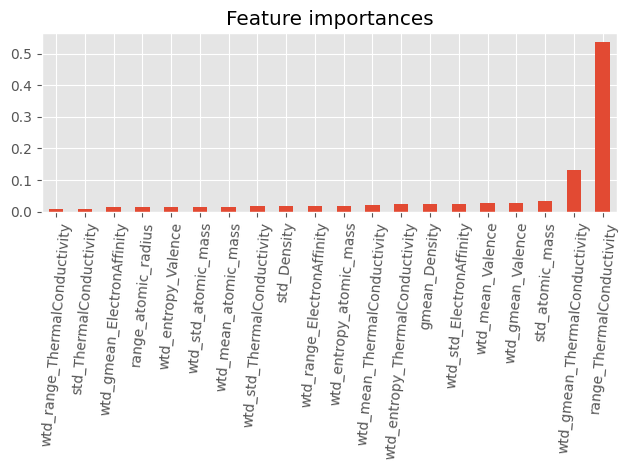

In [171]:
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=X_20.columns)
sorted_importances = forest_importances.sort_values()

fig, ax = plt.subplots()
sorted_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.tick_params(axis='x', labelrotation=85)
fig.tight_layout()